In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


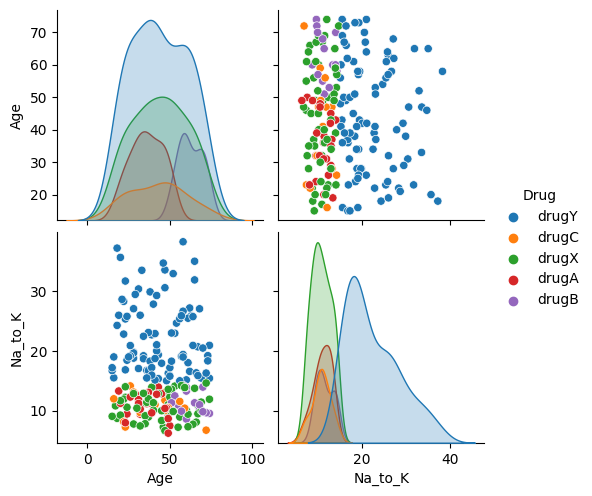

In [ ]:
sns.pairplot(data, hue='Drug')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
X = pd.get_dummies(data.drop('Drug', axis=1), drop_first=True, dtype=int)

In [ ]:
y = data['Drug']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
accuracy_score(y_test, test_preds)

0.9833333333333333

In [ ]:
confusion_matrix(y_test, test_preds)

array([[ 6,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0, 12,  1],
       [ 0,  0,  0,  0, 26]])

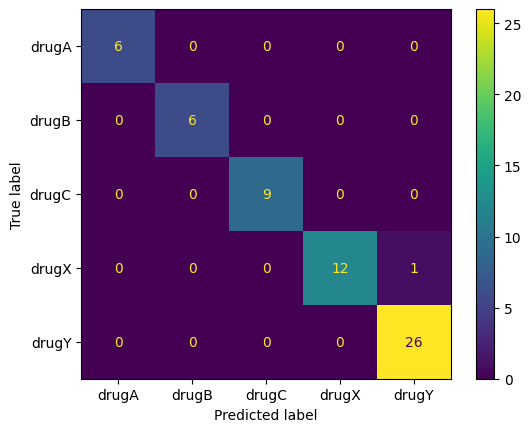

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds)

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60



# By adjusting hyperparameters


In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature importance']).sort_values('Feature importance')

,Feature importance
Sex_M,0.000000
Cholesterol_NORMAL,0.093384
BP_LOW,0.125818
Age,0.132994
BP_NORMAL,0.141509
Na_to_K,0.506297


In [ ]:
from sklearn.tree import plot_tree

[Text(0.75, 0.9, 'Na_to_K <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [17, 10, 7, 41, 65]'),
 Text(0.625, 0.7, 'BP_NORMAL <= 0.5\ngini = 0.623\nsamples = 75\nvalue = [17, 10, 7, 41, 0]'),
 Text(0.5, 0.5, 'BP_LOW <= 0.5\ngini = 0.725\nsamples = 46\nvalue = [17, 10, 7, 12, 0]'),
 Text(0.25, 0.3, 'Age <= 50.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]'),
 Text(0.75, 0.3, 'Cholesterol_NORMAL <= 0.5\ngini = 0.465\nsamples = 19\nvalue = [0, 0, 7, 12, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 65\nvalue = [0, 0, 0, 0, 65]')]

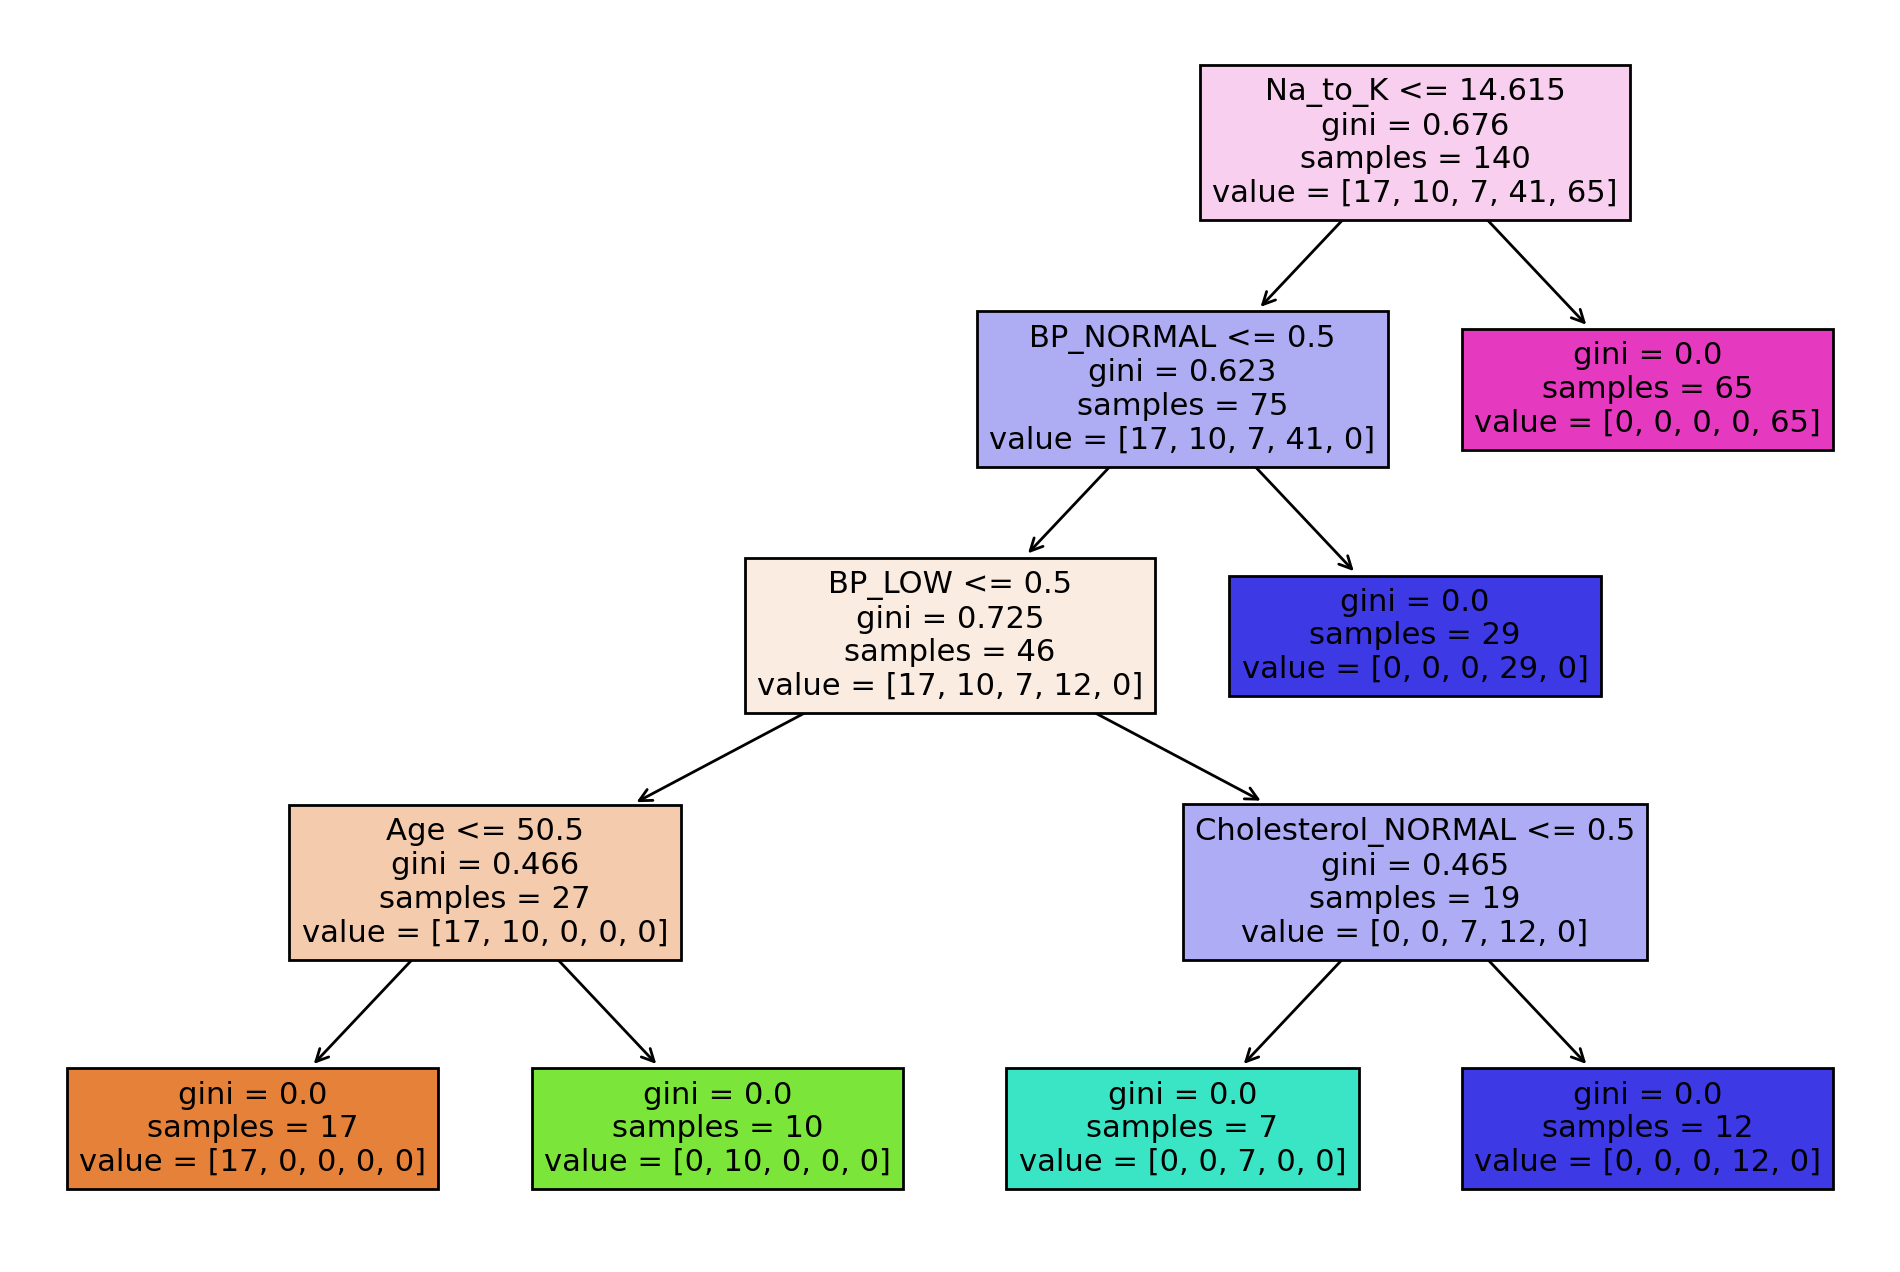

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True)

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    accuracy_score(y_test, test_preds)
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60





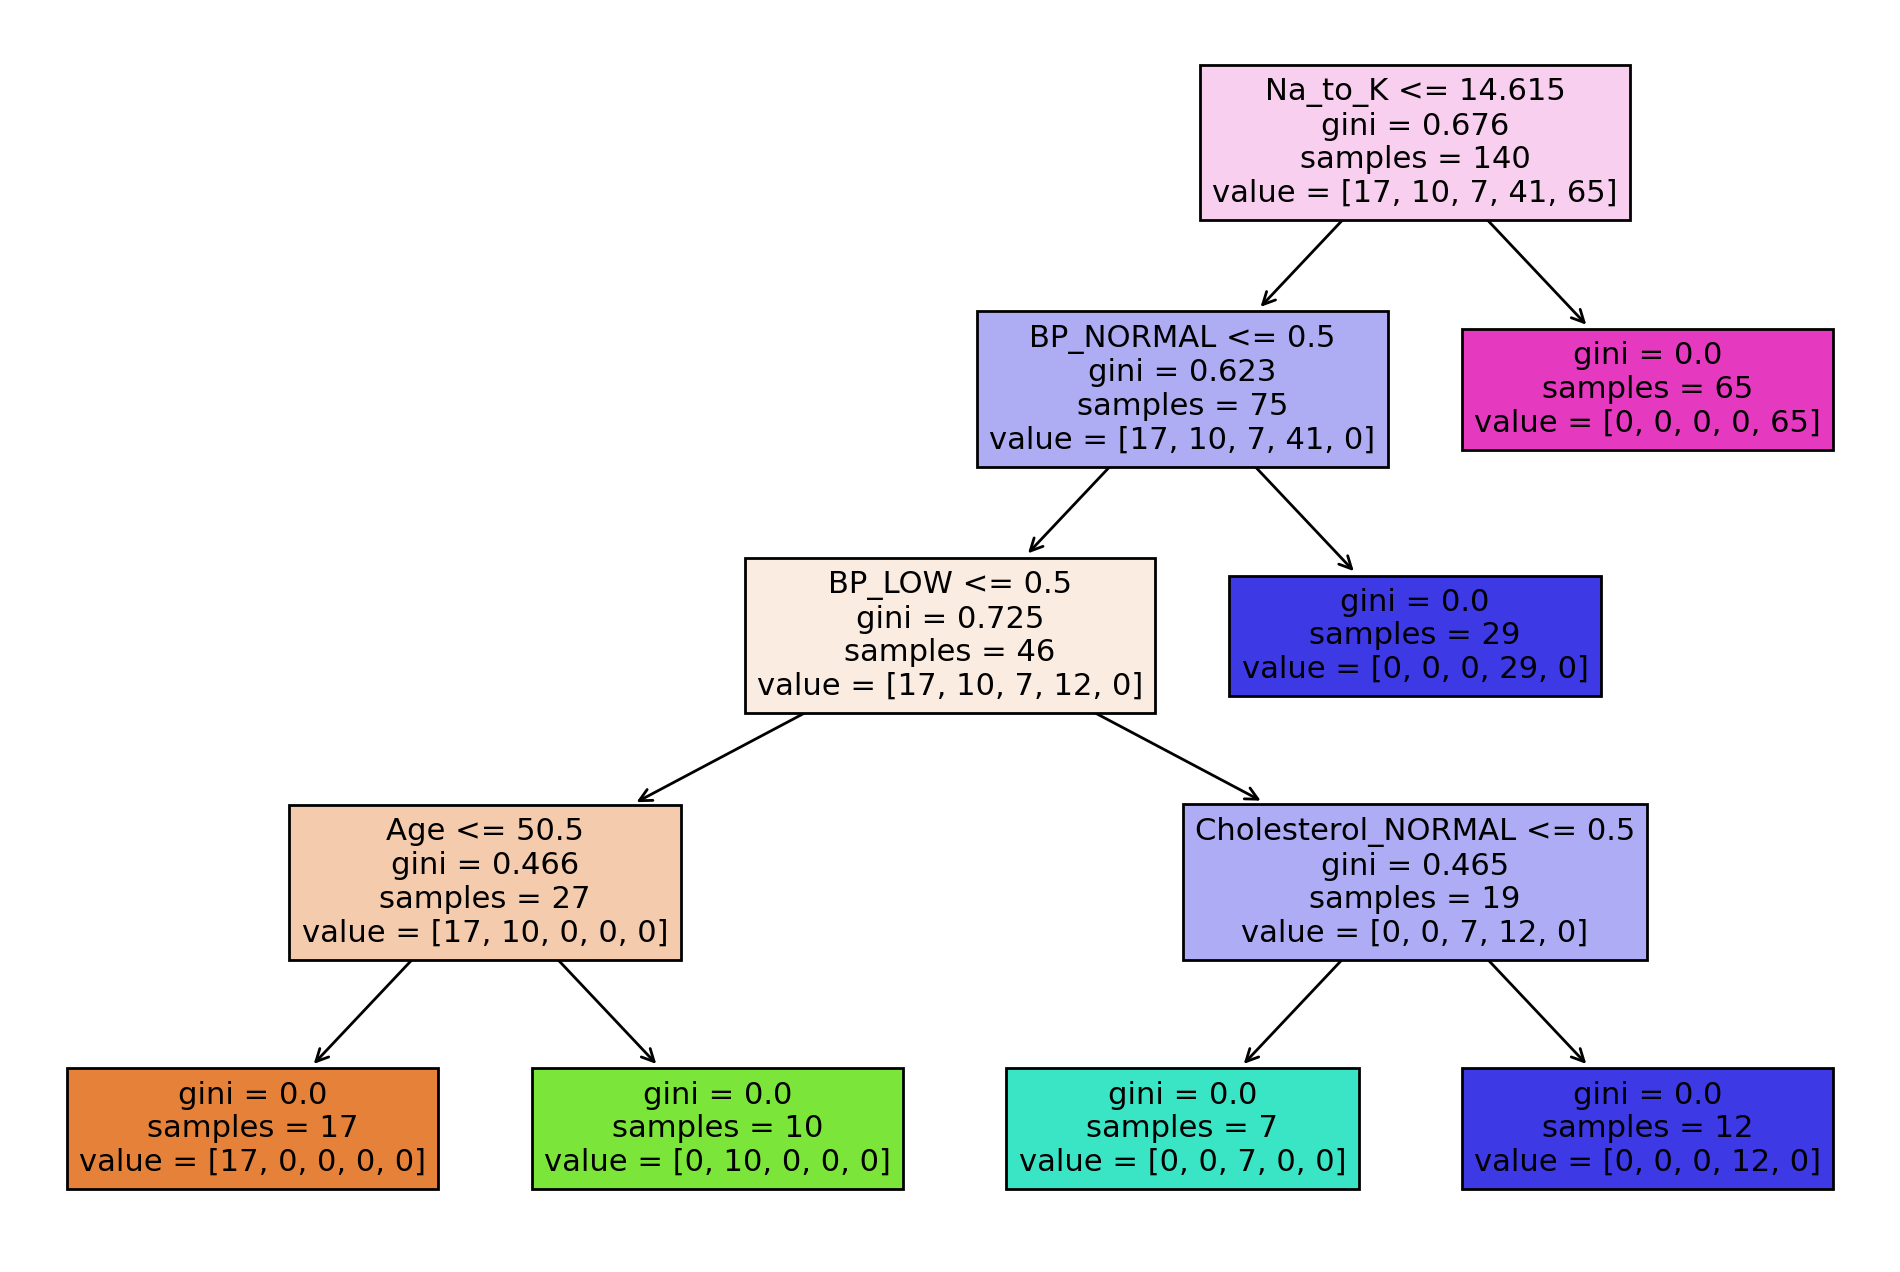

In [ ]:
report_model(model)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [ ]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       drugA       0.23      1.00      0.38         6
       drugB       0.00      0.00      0.00         6
       drugC       0.00      0.00      0.00         9
       drugX       1.00      0.54      0.70        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.65        60
   macro avg       0.44      0.51      0.41        60
weighted avg       0.66      0.65      0.61        60





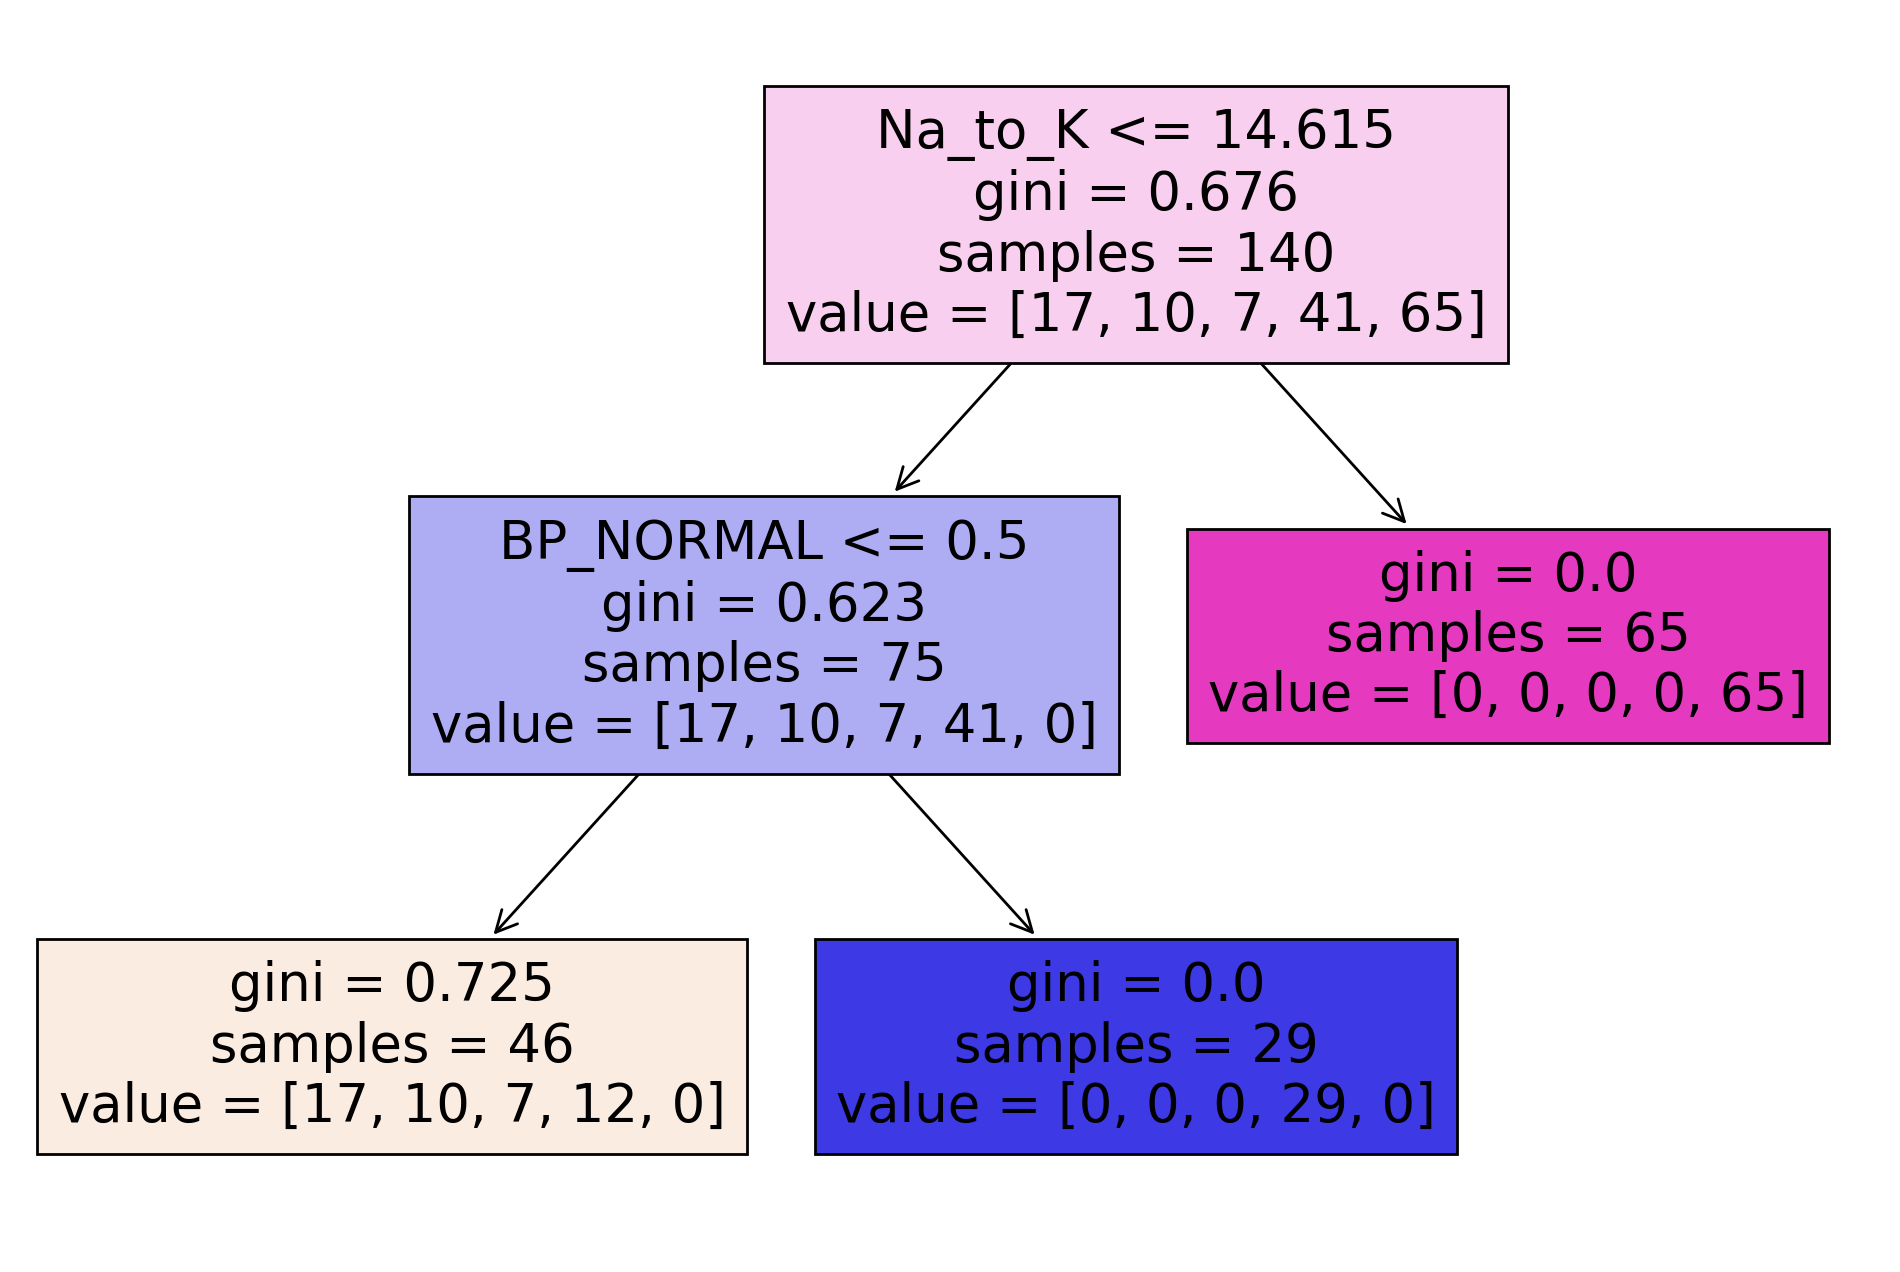

In [ ]:
report_model(pruned_tree)

In [ ]:
entropy_model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.92      0.96        13
       drugY       0.96      1.00      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.99        60
weighted avg       0.98      0.98      0.98        60





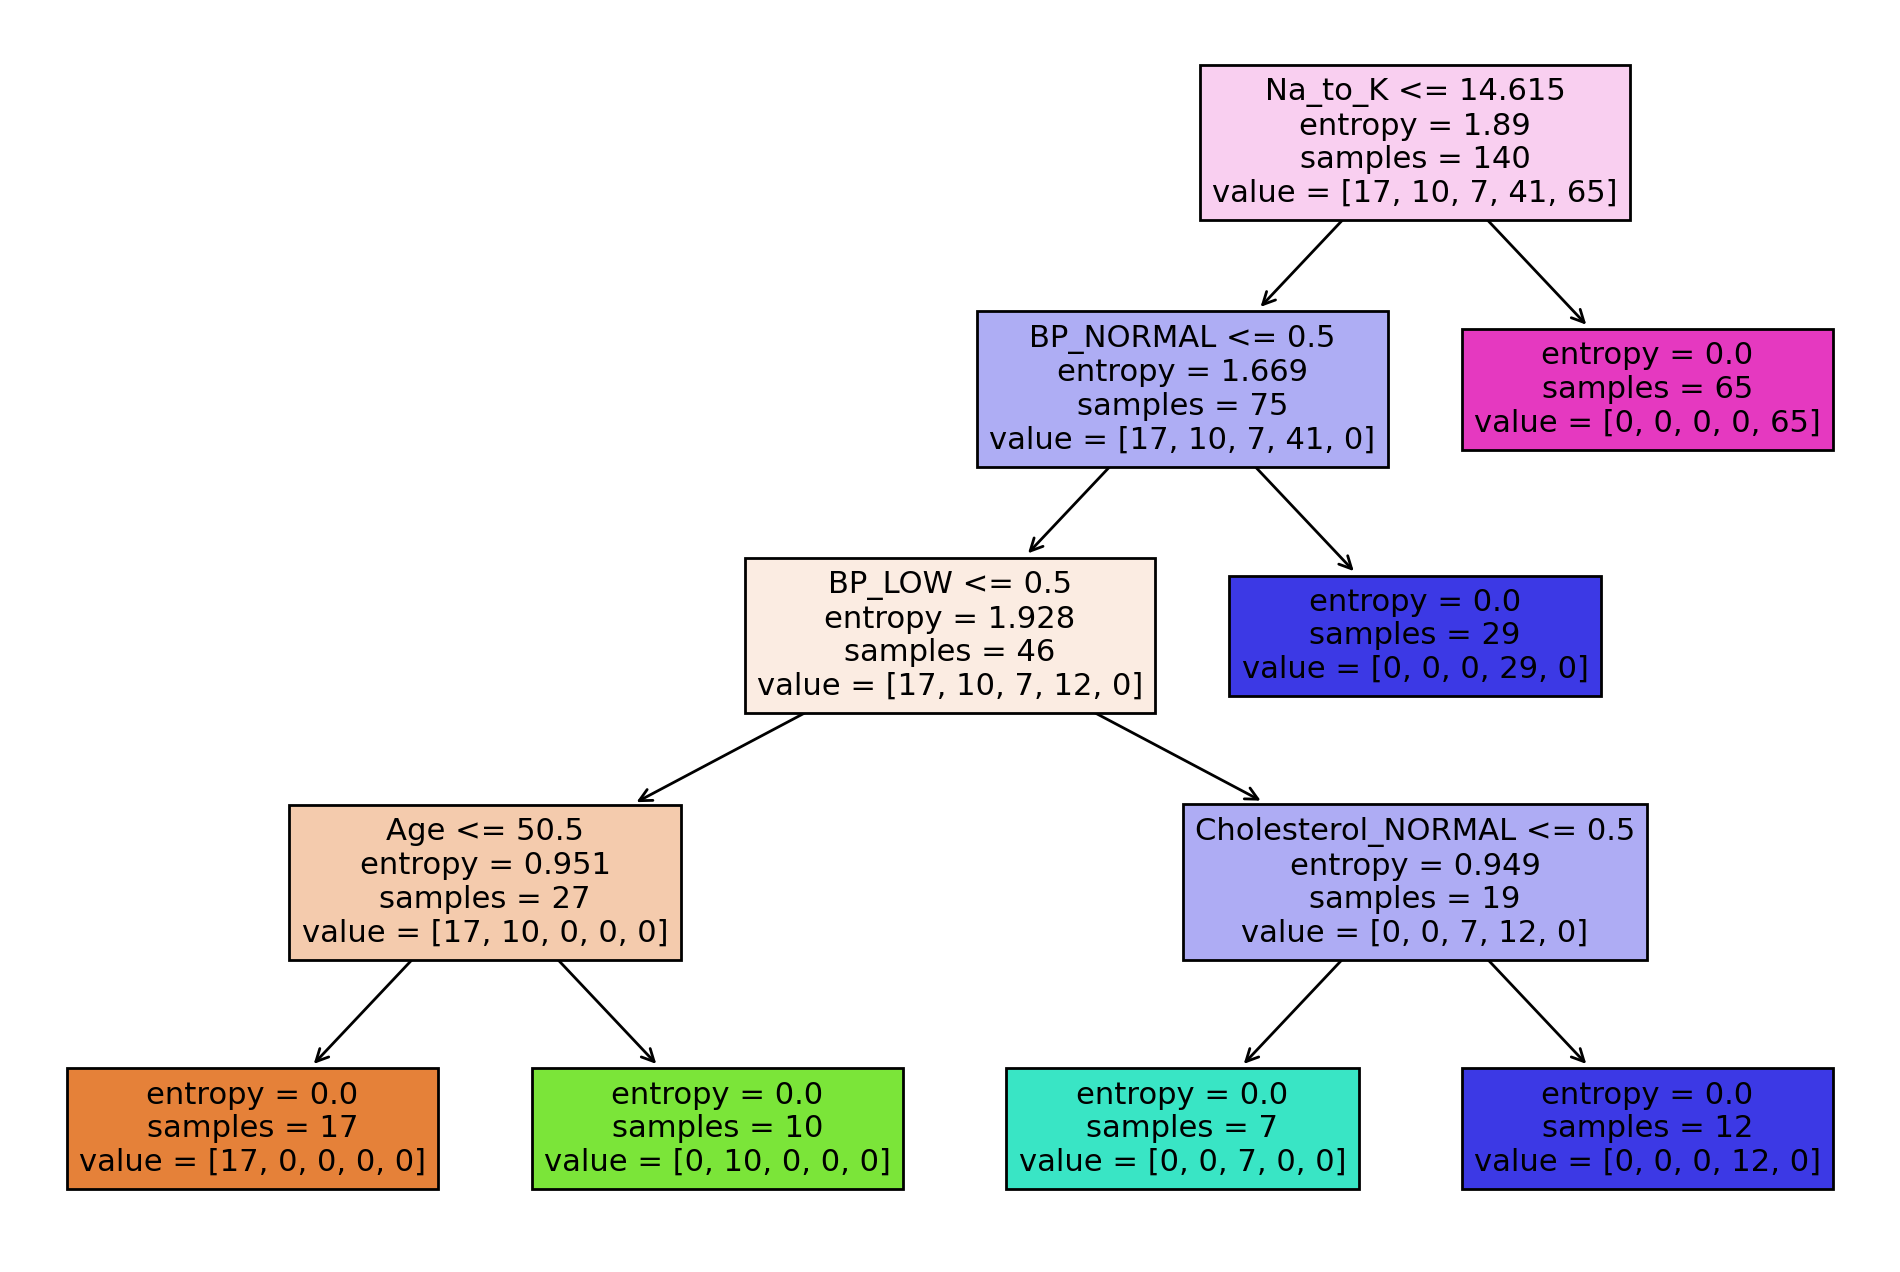

In [ ]:
report_model(entropy_model)